# Understanding the Problem 

From: [Kaggle Competition Description](https://www.kaggle.com/c/acea-water-prediction)

Acea group is a leading Italian multiutility operator. Acea operates several utility networks, one of them being water utilities. 

Acea needs to preserve their waterbodies, and thus needs to forecast the water level in a waterbody to handle daily consumption. During Fall and Winter waterbodies are refilled, but during Spring and Summer they drain. To preserve the health of these waterbodies it is important to rpedict the most efficient water availability, in terms of level and water flow for each day of the year.

# Data

We are provided with several datasets. Each dataset is for a different type of waterbody and has different features. There are 9 datasets in total, and four types of waterbodies we will be looking at (aquifer, water springs, rivers, lakes). 

We can start by loading in one of the aquifer datasets and takiong a look at what features we are given.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

# Load aquifer datasets
#auser = pd.read_csv('../data/Aquifer_Auser.csv')
#doganella = pd.read_csv('../data/Aquifer_Doganella.csv')
#luco = pd.read_csv('../data/Aquifer_Luco.csv')
petrignano_orig = pd.read_csv('../data/Aquifer_Petrignano.csv') # original data
petrignano = petrignano_orig # data which we will manipulate

# Print the features for the auser aquifer
print(petrignano_orig.columns)

Index(['Date', 'Rainfall_Bastia_Umbra', 'Depth_to_Groundwater_P24',
       'Depth_to_Groundwater_P25', 'Temperature_Bastia_Umbra',
       'Temperature_Petrignano', 'Volume_C10_Petrignano',
       'Hydrometry_Fiume_Chiascio_Petrignano'],
      dtype='object')


That is a whole lot of features. Luckily, we don't have to figure out what each one of these columns means. We've been given a table summarizing what each of the features means. I've summarized it here:


| Field        | Format           |
| :-------------:|:-------------:|
| Date | Identifies a unique day
| Rainfall_X   |    Indicates the quantity of rain falling, expressed in millimeters (mm), in the area X
| Depth_to_Groundwater_Y | Indicates the groundwater level, expressed in ground level (meters from the ground floor), detected by the piezometer Y   
| Temperature_Z | Indicates the temperature, expressed in degrees celsius, detected by thermometric station Z
| Volume_K | Indicates the volume of water, expressed in cubic meters taken from drinking water treatment plant K
| Hydrometry_H | Indicates the groundwater level, expressed in meters detected by hydrometric station K

In [45]:
# Convert date to date objects
petrignano['Date'] = petrignano['Date'].apply(lambda date: datetime.strptime(date, '%d/%m/%Y').date())

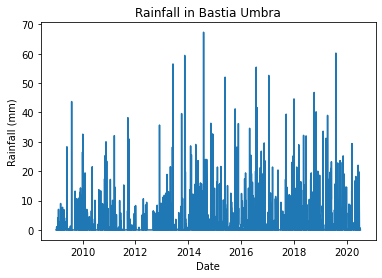

In [50]:
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall in Bastia Umbra')
plt.plot(petrignano['Date'], petrignano['Rainfall_Bastia_Umbra'])
plt.show()